In [77]:
import numpy as np
import pandas as pd

In [78]:
from google.colab import files
uploaded = files.upload()  # This will prompt to upload a file

import pandas as pd
df = pd.read_csv('train.csv')


Saving train.csv to train (5).csv


In [79]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50


In [80]:
df.shape

(5847, 14)

In [81]:
df.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5847 entries, 0 to 5846
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5847 non-null   int64  
 1   Name               5847 non-null   object 
 2   Location           5847 non-null   object 
 3   Year               5847 non-null   int64  
 4   Kilometers_Driven  5847 non-null   int64  
 5   Fuel_Type          5847 non-null   object 
 6   Transmission       5847 non-null   object 
 7   Owner_Type         5847 non-null   object 
 8   Mileage            5845 non-null   object 
 9   Engine             5811 non-null   object 
 10  Power              5811 non-null   object 
 11  Seats              5809 non-null   float64
 12  New_Price          815 non-null    object 
 13  Price              5847 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 639.6+ KB


a) Look for the missing values in all the columns and either impute them (replace with mean, median, or mode) or drop them. Justify your action for this task.

In [83]:
# Checking for missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  38
New_Price            5032
Price                   0
dtype: int64


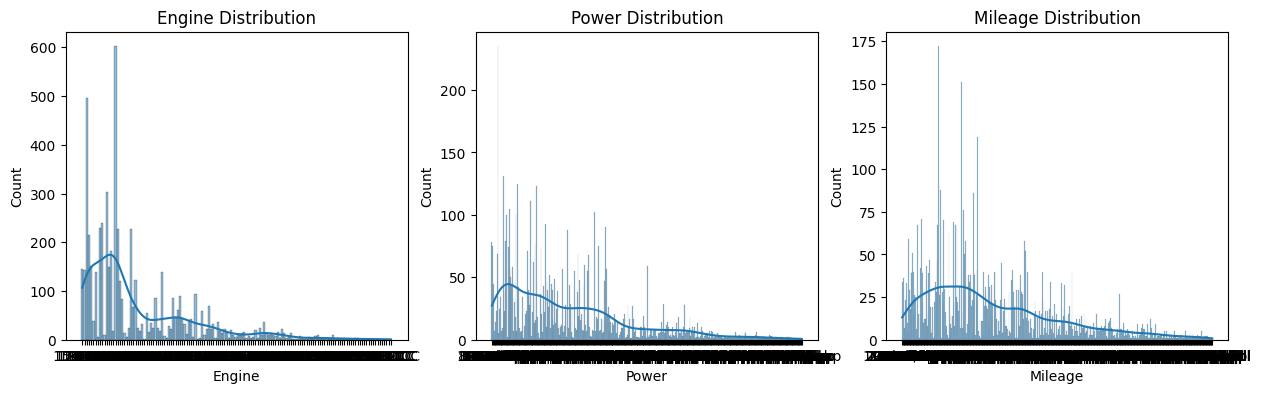

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms to check distributions
plt.figure(figsize=(15, 4))

# Engine Distribution
plt.subplot(1, 3, 1)
sns.histplot(df['Engine'].dropna(), kde=True)
plt.title('Engine Distribution')

# Power Distribution
plt.subplot(1, 3, 2)
sns.histplot(df['Power'].dropna(), kde=True)
plt.title('Power Distribution')

# Mileage Distribution
plt.subplot(1, 3, 3)
sns.histplot(df['Mileage'].dropna(), kde=True)
plt.title('Mileage Distribution')

plt.show()

In [85]:
# Dropping 'New_Price' column because it has too many missing values
df = df.drop(columns=['New_Price'])

# Converting 'Engine' and 'Power' columns to string to remove non-numeric characters
df['Engine'] = df['Engine'].astype(str)
df['Power'] = df['Power'].astype(str)

# Removing non-numeric characters in 'Engine' and 'Power' columns
df['Engine'] = df['Engine'].str.extract('(\d+)', expand=False)
df['Power'] = df['Power'].str.extract('(\d+(\.\d+)?)', expand=False)[0]

# Now converting columns to numeric values
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')

# Impute missing values
df['Engine'] = df['Engine'].fillna(df['Engine'].median())  # Median for 'Engine'
df['Power'] = df['Power'].fillna(df['Power'].median())      # Median for 'Power'
df['Seats'] = df['Seats'].fillna(df['Seats'].mode()[0])     # Mode for 'Seats'

# Checking unique values in the 'Mileage' column to diagnose missing values
print("Unique values in 'Mileage' before processing:")
print(df['Mileage'].unique())

# Cleaning the 'Mileage' column and ensure it's numeric
df['Mileage'] = df['Mileage'].astype(str).str.replace(' kmpl', '', regex=False)  # Adjust this based on your data
df['Mileage'] = df['Mileage'].str.extract('(\d+(\.\d+)?)', expand=False)[0]

# Converting 'Mileage' to numeric, handling errors
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')

# Impute missing values in 'Mileage' with the median
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].median())

# Step 10: Check for remaining missing values after all operations
remaining_missing = df.isnull().sum()

# Step 11: Display the modified DataFrame and remaining missing values
print(df.head())
print("\nRemaining Missing Values After Imputation in df:\n", remaining_missing)


Unique values in 'Mileage' before processing:
['19.67 kmpl' '13 km/kg' '20.77 kmpl' '15.2 kmpl' '23.08 kmpl'
 '11.36 kmpl' '20.54 kmpl' '22.3 kmpl' '21.56 kmpl' '16.8 kmpl'
 '25.2 kmpl' '12.7 kmpl' '0.0 kmpl' '13.5 kmpl' '25.8 kmpl' '28.4 kmpl'
 '20.45 kmpl' '14.84 kmpl' '22.69 kmpl' '23.65 kmpl' '13.53 kmpl'
 '18.5 kmpl' '14.4 kmpl' '16.48 km/kg' '20.92 kmpl' '17.5 kmpl'
 '12.8 kmpl' '19.01 kmpl' '14.53 kmpl' '11.18 kmpl' '12.4 kmpl'
 '16.09 kmpl' '14.0 kmpl' '24.3 kmpl' '18.15 kmpl' '11.74 kmpl'
 '22.07 kmpl' '19.7 kmpl' '25.4 kmpl' '25.32 kmpl' '14.62 kmpl'
 '14.28 kmpl' '14.9 kmpl' '11.25 kmpl' '24.4 kmpl' '16.55 kmpl'
 '17.11 kmpl' '22.9 kmpl' '17.8 kmpl' '18.9 kmpl' '15.04 kmpl'
 '25.17 kmpl' '20.36 kmpl' '9.49 km/kg' '18.2 kmpl' '13.68 kmpl'
 '20.0 kmpl' '15.8 kmpl' '25.0 kmpl' '16.4 kmpl' '24.52 kmpl' '22.1 kmpl'
 '8.5 kmpl' '15.1 kmpl' '16.95 kmpl' '19.64 kmpl' '16.5 kmpl' '18.53 kmpl'
 '17.57 kmpl' '18.0 kmpl' '23.2 kmpl' '16.73 kmpl' '13.0 kmpl'
 '17.68 kmpl' '22.7 kmpl' '16

I removed the "New_Price" column because it contained around 85% missing values, making it unreliable for analysis. For the "Engine," "Mileage," and "Power" columns, I used the median to fill missing values, as all three distributions are positively skewed and asymmetrical. This positive skewness indicates a higher concentration of lower values on the left side, with a gradual decline toward higher values, likely due to most cars experiencing a reduction in engine performance, mileage, and power ratings after a certain amount of usage. For the "Seats" column, I used the mode to fill in missing values, as the dataset predominantly includes cars with 5 seats, making the mode a suitable choice to represent typical seating.

b) Remove the units from some of the attributes and only keep the numerical values (for example remove kmpl from “Mileage”, CC from “Engine”, bhp from “Power”, and lakh from “New_price”).

In [86]:
# Removing 'kmpl' from 'Mileage' and convert to numeric
df['Mileage'] = df['Mileage'].astype(str).str.replace(' kmpl', '', regex=False)
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')

# Removing 'CC' from 'Engine' and convert to numeric
df['Engine'] = df['Engine'].astype(str).str.replace(' CC', '', regex=False)
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')

# Removing 'bhp' from 'Power' and convert to numeric
df['Power'] = df['Power'].astype(str).str.replace(' bhp', '', regex=False)
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')

# Displaying the results to verify
print(df[['Mileage', 'Engine', 'Power']].head())


   Mileage  Engine   Power
0    19.67  1582.0  126.20
1    13.00  1199.0   88.70
2    20.77  1248.0   88.76
3    15.20  1968.0  140.80
4    23.08  1461.0   63.10


In [87]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13.00,1199.0,88.70,5.0,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


C) Change the categorical variables (“Fuel_Type” and “Transmission”) into numerical one hot encoded value. (4 points).

In [88]:
# Replacing the categorical values with the numeric equivalents that we have above
categoricalFeatures = ['Fuel_Type', 'Transmission']

# Iterate through the list of categorical features and one hot encode them.
for feature in categoricalFeatures:
    onehot = pd.get_dummies(df[feature], prefix=feature)
    df = df.drop(feature, axis=1)
    df = df.join(onehot)


In [89]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,19.67,1582.0,126.20,5.0,12.50,True,False,False,False,True
1,2,Honda Jazz V,Chennai,2011,46000,First,13.00,1199.0,88.70,5.0,4.50,False,False,True,False,True
2,3,Maruti Ertiga VDI,Chennai,2012,87000,First,20.77,1248.0,88.76,7.0,6.00,True,False,False,False,True
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Second,15.20,1968.0,140.80,5.0,17.74,True,False,False,True,False
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,First,23.08,1461.0,63.10,5.0,3.50,True,False,False,False,True


D) Create one more feature and add this column to the dataset (you can use mutate function in R for this). For example, you can calculate the current age of the car by subtracting “Year” value
from the current year.

In [90]:
from datetime import datetime

# Calculate the current age of the car
current_year = datetime.now().year
df['Car_Age'] = current_year - df['Year']

# Display the result to verify the new column
print(df[['Year', 'Car_Age']].head())


   Year  Car_Age
0  2015        9
1  2011       13
2  2012       12
3  2013       11
4  2013       11


In [91]:
# Calculate the average mileage per year, with handling for zero age cases
df['Mileage_per_Year'] = df.apply(lambda row: row['Kilometers_Driven'] / row['Car_Age']
                                  if row['Car_Age'] > 0 else row['Kilometers_Driven'], axis=1)

df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Car_Age,Mileage_per_Year
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,19.67,1582.0,126.20,5.0,12.50,True,False,False,False,True,9,4555.555556
1,2,Honda Jazz V,Chennai,2011,46000,First,13.00,1199.0,88.70,5.0,4.50,False,False,True,False,True,13,3538.461538
2,3,Maruti Ertiga VDI,Chennai,2012,87000,First,20.77,1248.0,88.76,7.0,6.00,True,False,False,False,True,12,7250.000000
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Second,15.20,1968.0,140.80,5.0,17.74,True,False,False,True,False,11,3697.272727
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,First,23.08,1461.0,63.10,5.0,3.50,True,False,False,False,True,11,7909.000000


The code calculates a new feature called Mileage per Year, which represents the average number of kilometers a car has been driven each year since it was manufactured.

e) Perform select, filter, rename, mutate, arrange and summarize with group by operations (or their equivalent operations in python) on this dataset.

In [92]:
df.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_Petrol',
       'Transmission_Automatic', 'Transmission_Manual', 'Car_Age',
       'Mileage_per_Year'],
      dtype='object')

In [95]:

# 1. Select Specific Columns
# Let's select the columns: 'Name', 'Year', 'Kilometers_Driven', 'Fuel_Type_Diesel', and 'Price'
df_selected = df[['Name', 'Year', 'Kilometers_Driven', 'Fuel_Type_Diesel', 'Price']]

# 2. Filter Rows Based on a Condition
# Filter for rows where the car is diesel and has a price above a certain value, say 5 lakhs
df_filtered = df[(df['Fuel_Type_Diesel'] == 1) & (df['Price'] > 5)]

# 3. Rename Columns
# Rename 'Kilometers_Driven' to 'KmDriven' and 'Owner_Type' to 'OwnerType'
df_renamed = df.rename(columns={'Kilometers_Driven': 'KmDriven', 'Owner_Type': 'OwnerType'})

# 4. Mutate (Create or Modify Columns)
# Add a new column 'Price_per_Km' which calculates the price per kilometer driven
df['Price_per_Km'] = df['Price'] / df['Kilometers_Driven']

# 5. Arrange (Sort Rows)
# Sort by 'Year' in descending order
df_sorted = df.sort_values(by='Year', ascending=False)

# 6. Summarize with Group By
# Group by 'Fuel_Type_Diesel' and find the average price and average mileage
df_summary = df.groupby('Fuel_Type_Diesel').agg(
    Avg_Price=('Price', 'mean'),
    Avg_Mileage=('Mileage', 'mean')
).reset_index()

# Displaying results
print("Selected Columns:\n", df_selected.head())
print("\nFiltered Data:\n", df_filtered.head())
print("\nRenamed Columns:\n", df_renamed.head())
print("\nNew Column (Price_per_Km):\n", df[['Price', 'Kilometers_Driven', 'Price_per_Km']].head())
print("\nSorted by Year Descending:\n", df_sorted.head())
print("\nSummary (Average Price and Mileage by Diesel Fuel Type):\n", df_summary)


Selected Columns:
                                Name  Year  Kilometers_Driven  \
0  Hyundai Creta 1.6 CRDi SX Option  2015              41000   
1                      Honda Jazz V  2011              46000   
2                 Maruti Ertiga VDI  2012              87000   
3   Audi A4 New 2.0 TDI Multitronic  2013              40670   
4            Nissan Micra Diesel XV  2013              86999   

   Fuel_Type_Diesel  Price  
0              True  12.50  
1             False   4.50  
2              True   6.00  
3              True  17.74  
4              True   3.50  

Filtered Data:
    Unnamed: 0                                 Name    Location  Year  \
0           1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           3                    Maruti Ertiga VDI     Chennai  2012   
3           4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
5           7    Toyota Innova Crysta 2.8 GX AT 8S      Mumbai  2016   
6           8  Volkswagen Vento Diesel Comfor